In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Gaelim/Clinic_Analysis_Pandas/master/hospital_data.csv")

#### Explore data
we will explore the native functions and the dataset

In [2]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1    Medication Revenue     29999 non-null  object
 2     Lab Cost              29999 non-null  object
 3    Consultation Revenue   29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [4]:
df.columns

Index(['Date', ' Medication Revenue ', '  Lab Cost ', ' Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [5]:
# clean the spaces in the column headings
df.columns = ['Date', 'Medication Revenue ', 'Lab Cost ', 'Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1   Medication Revenue      29999 non-null  object
 2   Lab Cost                29999 non-null  object
 3   Consultation Revenue    29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1   Medication Revenue      29999 non-null  object
 2   Lab Cost                29999 non-null  object
 3   Consultation Revenue    29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [8]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [9]:
def clean_df(x):
    x = x.replace("$","")
    x = x.replace("-","")
    x = x.replace(",","")
    x = x.replace(" ","")
    x = pd.to_numeric(x)
    return x

In [10]:
clean_df('$1,183.22')

1183.22

In [11]:
df["Medication Revenue"] = df["Medication Revenue"].apply(clean_df)
df["Lab Cost"] = df["Lab Cost"].apply(clean_df)
df["Consultation Revenue"] = df["Consultation Revenue"].apply(clean_df)

In [12]:
df = df.fillna(0)

In [13]:
df["Total Revenue"] = df["Medication Revenue"]+df["Lab Cost"]+df["Consultation Revenue"]

In [14]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue
0,11/4/2019 0:00,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,1213.39
1,11/6/2019 0:00,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,753.48
2,11/2/2019 0:00,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,681.17
3,11/6/2019 0:00,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,600.00
4,11/1/2019 0:00,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,603.60


In [15]:
# create a quick get hour function
def get_hour(x):
    x = pd.to_datetime(x)
    x = x.hour
    return x

In [16]:
# create entry hour
df["Entry Hour"] = df["Entry Time"].apply(get_hour)

In [17]:
# create other hour
df["Post-Consultation Hour"] = df["Post-Consultation Time"].apply(get_hour)
df["Completion Hour"] = df["Completion Time"].apply(get_hour)

In [18]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour,Post-Consultation Hour,Completion Hour
0,11/4/2019 0:00,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,1213.39,8,9,9
1,11/6/2019 0:00,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,753.48,19,21,21
2,11/2/2019 0:00,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,681.17,10,11,12
3,11/6/2019 0:00,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,600.00,9,10,10
4,11/1/2019 0:00,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,603.60,11,12,12


### Visualize our results
the organization want to see a heatmap of when the clinic receives the most patient and revenue

In [19]:
# create day of the week
df.Date = pd.to_datetime(df.Date)
df["days of the week"] = df.Date.dt.dayofweek
df["name of days"] = df.Date.dt.strftime("%A")

In [20]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour,Post-Consultation Hour,Completion Hour,days of the week,name of days
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001,1213.39,8,9,9,0,Monday
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,753.48,19,21,21,2,Wednesday
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003,681.17,10,11,12,5,Saturday
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004,600.00,9,10,10,2,Wednesday
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005,603.60,11,12,12,4,Friday


In [21]:
# import our visualization library
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

In [22]:
df.groupby("name of days")["Total Revenue"].sum().sort_values()

name of days
Thursday      97480.16
Sunday       111779.72
Saturday     124407.67
Wednesday    156197.58
Friday       177569.50
Tuesday      209864.37
Monday       266648.00
Name: Total Revenue, dtype: float64

<AxesSubplot:xlabel='name of days', ylabel='Total Revenue'>

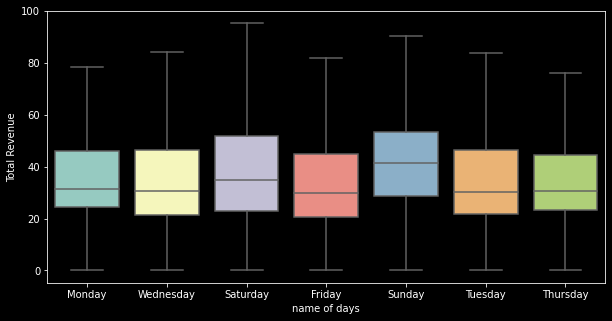

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,y="Total Revenue",x="name of days",showfliers=False)

<AxesSubplot:xlabel='name of days', ylabel='Total Revenue'>

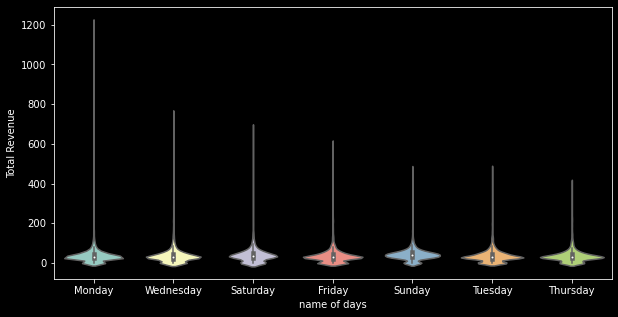

In [24]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df,y="Total Revenue",x="name of days")

<AxesSubplot:ylabel='Entry Hour'>

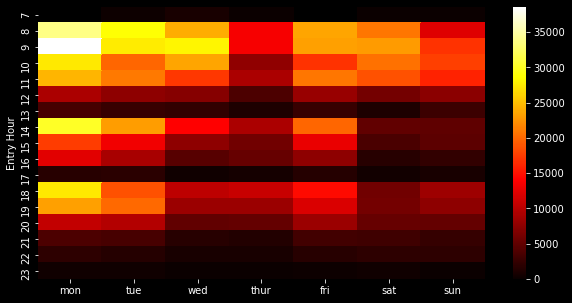

In [25]:
# create a pivot table
pivot = pd.pivot_table(data=df, index="Entry Hour", columns="days of the week", values="Total Revenue", aggfunc="sum")
pivot.columns = ["mon","tue","wed","thur","fri","sat","sun"]
plt.figure(figsize=(10,5))
sns.heatmap(pivot, cmap="hot")

<AxesSubplot:ylabel='Entry Hour'>

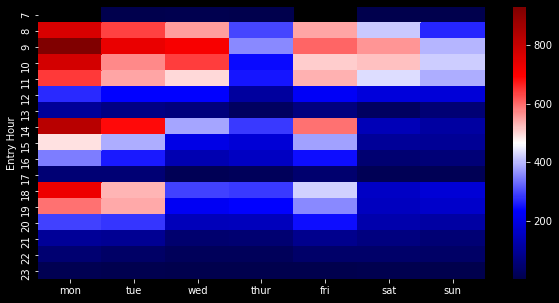

In [29]:
pivot = pd.pivot_table(data=df, index="Entry Hour", columns="days of the week", values="Patient ID", aggfunc="count")
pivot.columns = ["mon","tue","wed","thur","fri","sat","sun"]
plt.figure(figsize=(10,5))
sns.heatmap(pivot, cmap="seismic")

C:\Users\LTECH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days of the week', ylabel='Entry Hour'>

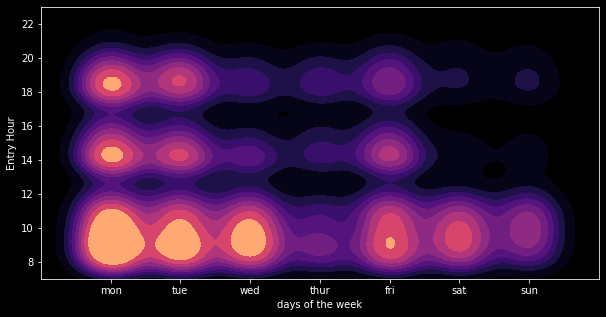

In [30]:
plt.figure(figsize=(10,5))
plt.xlim(-1,7)
plt.ylim(7,23)
plt.xticks([0,1,2,3,4,5,6],["mon","tue","wed","thur","fri","sat","sun"])
sns.kdeplot(df["days of the week"],df["Entry Hour"],fill=True, cmap="magma")

# Cleaned Dataset

In [28]:
df.to_csv("cleaned_clinic_data.csv")